<a href="https://colab.research.google.com/github/sanda-avram/BERT/blob/main/ROST4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [2]:
from datasets import Dataset
import pandas as pd
train_df=messages = pd.read_csv('trainSet2.csv', sep=',', names=["label", "text"])
test_df=messages = pd.read_csv('testSet2.csv', sep=',', names=["label", "text"])


train_ds = Dataset.from_pandas(train_df, split="train")
test_ds = Dataset.from_pandas(test_df, split="test")

In [ ]:
!pip install transformers

In [4]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1")

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/397k [00:00<?, ?B/s]

In [5]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_ds.map(tokenize_function, batched=True)
test_dataset = test_ds.map(tokenize_function, batched=True)

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [6]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("dumitrescustefan/bert-base-romanian-cased-v1", num_labels=10)


Downloading:   0%|          | 0.00/500M [00:00<?, ?B/s]

Some weights of the model checkpoint at dumitrescustefan/bert-base-romanian-cased-v1 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClass

In [7]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="testTrainer")

In [8]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


In [ ]:
!pip install evaluate

In [10]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [11]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [12]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="testTrainer", evaluation_strategy="epoch")

In [13]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [14]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4795
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1800
  Number of trainable parameters = 124449034


Epoch,Training Loss,Validation Loss,Accuracy
1,0.761900,0.578770,0.842906
2,0.154200,0.758109,0.854688
3,0.041300,0.748100,0.864016


Saving model checkpoint to testTrainer/checkpoint-500
Configuration saved in testTrainer/checkpoint-500/config.json
Model weights saved in testTrainer/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2037
  Batch size = 8
Saving model checkpoint to testTrainer/checkpoint-1000
Configuration saved in testTrainer/checkpoint-1000/config.json
Model weights saved in testTrainer/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num exampl

TrainOutput(global_step=1800, training_loss=0.26807090494367813, metrics={'train_runtime': 800.5179, 'train_samples_per_second': 17.97, 'train_steps_per_second': 2.249, 'total_flos': 1892562196331520.0, 'train_loss': 0.26807090494367813, 'epoch': 3.0})

In [ ]:
metric

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
#test_dataset['label']
#metric
predicted=trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2037
  Batch size = 8


In [17]:
#len(test_dataset['label'])
#type(test_dataset['label'])
#len(predicted.predictions)
#type(predicted.predictions)

predicted.predictions[2036]
predicted.predictions[0].tolist()
c=0
y=[]
for v in predicted.predictions:
  c+=1

  max = v[0]
  index = 0
  for i in range(1,len(v)):
    if v[i] > max:
      max = v[i]
      index = i
  y.append(index)
len(y)

2037

In [18]:
#predict.predictions
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#cm=confusion_matrix(test_dataset, predicted)
cm=confusion_matrix(test_dataset['label'], y)
print(cm)
accuracy = accuracy_score(test_dataset['label'], y)
print("accuracy:", accuracy)
# Calculate macro-accuracy
#macro_accuracy = np.mean(np.diag(cm))

#print("Macro-accuracy:", macro_accuracy/10)
from sklearn.metrics import classification_report

print(classification_report(test_dataset['label'], y, digits=3))

[[102   2   0   7   1   7   0   0   1   1]
 [  1 231   4  19   1   0   1   0  67   3]
 [  0   4 291   5   1   0   1   2  12   9]
 [  0   0   1 136   0   9   0   0   0   3]
 [  0   2   0   0  30   0   1   1  21   2]
 [  1   1   0   1   1 192   0   0   0   9]
 [  0   0   0   0   2   0  25   2   1   2]
 [  0   0   0   0   2   0   5  95  25   7]
 [  0   3   0   0   3   0   0   0 179   3]
 [  1   0   1   5   4   6   0   0   3 479]]
accuracy: 0.8640157093765342
              precision    recall  f1-score   support

           0      0.971     0.843     0.903       121
           1      0.951     0.706     0.811       327
           2      0.980     0.895     0.936       325
           3      0.786     0.913     0.845       149
           4      0.667     0.526     0.588        57
           5      0.897     0.937     0.916       205
           6      0.758     0.781     0.769        32
           7      0.950     0.709     0.812       134
           8      0.579     0.952     0.720       188

In [19]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(test_dataset['label'], y)

0.8222687396658925

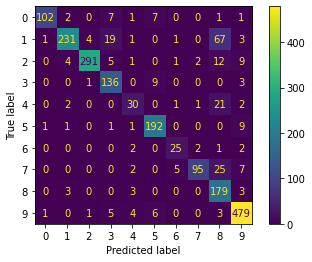

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()